# <div align = 'center'> <font color='red'> BOLUM 8
#  <div align = 'center'> <font color='red'>                           XGBOOSTING

In [3]:
import pandas as pd

In [4]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('data/LifeExpectancy.csv', index_col=0)

In [17]:
df2 = pd.read_csv('data/Wine.csv')
df2.type =  df2.type.map({'white':0, 'red':1} )

In [18]:
df2.head(1)

,Unnamed: 0,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1


## 1. XGBoost ile Sınıflandırma (xgb.DMatrix)

In [19]:
X = df.drop('Life_Expectancy', axis=1)
y = df.Life_Expectancy

In [30]:
X = df2.drop('quality_range', axis=1)
y = df2.quality_range


In [31]:
#Lifed_matrix = xgb.DMatrix(data = X, label=y)

In [32]:
wine_dmatrix = xgb.DMatrix(data = X, label=y)

Modelimizi oluşturuken kullancağımız parametreleri belirliyoruz. XGBoost parametreleri içinde en önemlilerinden bir tanesi objective paramatresidir. Bu parametre ile modelimizin hata fonksiyonu olarak ne kullanacağını belirtiyoruz.

Regresyon problemlerinde reg:linear
Sınıflandırma modellerinde ise, tahmin edilen sınıf için reg-logistic, tahmin ihtimali için ise binary:logistic ifadesi kullanılır.

In [33]:
params = {"objective":"reg:logistic", "max_depth":3, "silent":1}

In [34]:
df2_cv = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(df2_cv)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.262660,0.003347,0.271357,0.003454
1,0.256349,0.003424,0.266432,0.006400
2,0.251809,0.004661,0.263199,0.004990
3,0.250501,0.003417,0.264893,0.007354
4,0.244498,0.002306,0.261507,0.007842


xgb.cv fonksiyonunda değerlendirme metriği olarak hata oranı ("error") tanımladık. as_pandas parametresini True olarak belirttiğimiz için sonuç olarak test ve eğitim verileri için hata oranını ve hata oranının standart sapmasını veri çerçevesi olarak döndürdü. Hata değerini 1'den çıkararak doğruluk (accuracy) değerini bulabiliriz.

In [35]:
print('Doğruluk Değeri : {:.3f}'.format((1-df_cv["test-error-mean"]).max()))

Doğruluk Değeri : 0.738


Modelimiz 5 iterasyon sonunda en 0.825 gibi bir duğruluk değerine ulaştı.

Modelimizin performansını AUC skoru ile de değerlendirebiliriz.

In [37]:
wine_auc = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
display(wine_auc)
print('AUC Skoru : {:.3f}'.format(wine_auc["test-auc-mean"].max()))


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.786421,0.004296,0.768510,0.005279
1,0.803147,0.001637,0.787364,0.005780
2,0.812467,0.002649,0.796505,0.002184
3,0.817142,0.002379,0.800257,0.000868
4,0.822573,0.000661,0.802156,0.003129


AUC Skoru : 0.802


## 2. XGBoost ile Regresyon (XGBRegressor)

In [50]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


df.head()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,16.6,6.9,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,16.6,6.9,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,16.6,6.9,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,16.6,6.9,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,16.6,6.9,0.454,9.5


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


xg_reg = xgb.XGBRegressor(objective ='reg:linear', seed=40)

In [54]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

[21:20:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.466994


XGBoost varsayılan değer olarak zayıf öğrenici olarak karar ağaçlarını kullandığı için booster="gbtree" varsayılan olarak belirlenmiştir. XGBoost'ta çok kullanılmasa da karar ağacı yerine lineer model kullanmak istersek booster:"gblinear" şeklinde belirtebiliriz. Bu yöntem çok yaygın olmadığından bu yöntem sklearn API ile kullanılamamakta. Bu yüzden bunun için yine DMatrix veri yapısını kullanmamız gerekecek

In [55]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)

In [56]:
params = {"booster":"gblinear", "objective":"reg:linear"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

#Modelimizi eğittik. Şimdi performansına bakalım.

[21:20:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
y_pred_gblinear = xg_reg.predict(DM_test)
rmse_gblinear = np.sqrt(mean_squared_error(y_test, y_pred_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 0.466994


İki modelin Kök Ortalama Kare Hataların (RMSE) karşılaştırdığımızda karar ağaçlarını zayıf öğrenme algoritması olarak kullanan modelin çok daha iyi olduğunu görüyoruz.

In [58]:
rmse_gblinear

0.46699405008093897

In [59]:
rmse_reg

0.3948311718244044

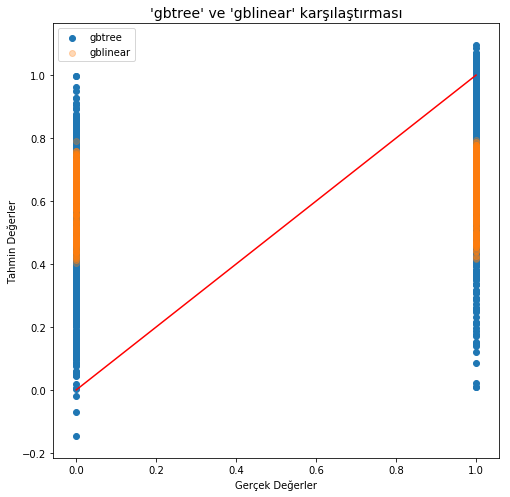

In [60]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' ve 'gblinear' karşılaştırması", size = 14)
ax1 = plt.scatter(y_test, y_pred)
ax2 = plt.scatter(y_test, y_pred_gblinear, alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()


## 3. XGBoost ile model performansını artırma

Temel olarak XGBoost ile nasıl regresyon ve sınıflandırma modelleri oluşturulacağını gördük. Artık modelimizin kalitesini artıracak yöntemlere bakabiliriz.

## 3.1. XGBoost ile Çapraz Doğrulama
Çapraz doğrulama için XGBoost'un içerisinde yer alan cv fonksiyonunu kullanabileceğimiz gibi sklearn içerisinde yer alan cross_val_score fonksiyonunu da kullanabiliriz.

Çapraz doğrulama ile Ortalama Mutlak Hata (MAE) ve Kök Ortalama Kare Hata (RMSE) değerlerine odaklanalım.

In [74]:
df2_cv = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=3, 
                    num_boost_round=100, metrics="rmse", as_pandas=True, seed=123, early_stopping_rounds = 5)

display(df2_cv.sort_values(by='test-rmse-mean').head(10))

[21:34:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
99,0.429942,0.002344,0.430812,0.004979
98,0.430032,0.002345,0.430902,0.004981
97,0.430125,0.002347,0.430992,0.004984
96,0.430217,0.002348,0.431082,0.004986
95,0.430310,0.002350,0.431174,0.004989
94,0.430404,0.002352,0.431266,0.004991
93,0.430499,0.002353,0.431359,0.004993
92,0.430595,0.002355,0.431453,0.004996
91,0.430691,0.002357,0.431547,0.004998
90,0.430789,0.002358,0.431642,0.005000


RMSE değeri 99. iterasyonda 0.430812'ye indi.

#### metrics parametresini "mae" olarak değiştirerek modelin ortalama mutlak hata değerini öğrenebiliriz.


In [73]:
df2_cv = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=3, 
                    num_boost_round=100, metrics="mae", as_pandas=True, seed=123, early_stopping_rounds = 5)

display(df2_cv.sort_values(by='test-mae-mean').head(10))

[21:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
99,0.378935,0.004048,0.379770,0.004606
98,0.379083,0.004051,0.379915,0.004602
97,0.379232,0.004055,0.380061,0.004597
96,0.379383,0.004059,0.380210,0.004593
95,0.379536,0.004062,0.380361,0.004588
94,0.379692,0.004066,0.380515,0.004584
93,0.379850,0.004069,0.380671,0.004580
92,0.380010,0.004073,0.380829,0.004576
91,0.380173,0.004076,0.380989,0.004571
90,0.380339,0.004079,0.381152,0.004566


## 3.2. XGBoost ile Regularizasyon

XBoost'da regularizasyon için çoğunlukla aşağıdaki parametreleri kullanmaktayız:

**gamma** : Ağaçların bölünmesi esnasında izin verilen maksimum kayıp azalması. Büyük değerler olduğu takdirde daha az dallanma olacaktır.

**alpha** : Daha önceki lineer modellerde de gördüğümüz dalların ağırlıklarının l1 regularizasyonu. Büyük değerler daha fazla regularizasyon anlamına gelmektedir. Bu durumda bir çok ağacın ağırlığı 0 olmaktadır.

**lambda**: Dalların ağırlıklarının l2 regularizasyonu. l1 regularizasyonuna göre daha yumuşaktır.
L1 regularizasyonuna bakalım. alpha değerleri için bir liste oluşturup bir döngü ile tüm değerleri deneyelim. Herbir alpha değeri için RMSE değerlerini bir listeye atalım. params sözlüğü içinde alpha değeri bulunmuyordu. Döngü içerisinde sırasıyla listedeki alpha değerlerini parametrelere ekleyip, çapraz doğrulama modelimizi eğiteceğiz.

In [75]:
l1_params = np.arange(0.01, 0.2, 0.01)

params = {"objective":"reg:linear","max_depth":3, "silent":1}

rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [76]:
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi l1 değerleri:


,l1,rmse
0,0.01,0.388006
4,0.05,0.388311
15,0.16,0.388379
1,0.02,0.388426
5,0.06,0.388500


In [77]:
gamma_listesi = [0.1, 1, 10, 100]

params = {"objective":"reg:linear","max_depth":3, "silent":1}

rmses_l1 = []
for gamma in l1_params:
    params["gamma"] = gamma
    cv_rmse = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [78]:
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi l1 değerleri:


,l1,rmse
6,0.07,0.388549
2,0.03,0.388822
17,0.18,0.389137
8,0.09,0.389152
7,0.08,0.389275


## 3.3. Hiperparametre Ayarlama 


Bütün makine öğrenimi modellerinde olduğu gibi XGBoost'da da hiperparametre ayarlaması modelin performansını oldukça etkilemektedir. Hatta XGBoost'da diğer algoritmalara nazaran daha çok parametre bulunmaktadır. Modelin kullanacağı parametreleri bir sözlük içerisinde belirttiğimizi görmüştük. Modeli oluşturuken bu sözlüğe daha fazla değişken tanımlayarak parametre ayarlaması yapabiliriz.

Modelin boosting için kaç iterasyon yapacağını num_boost_round değişkeni ile belirleyebiliyoruz. Ancak early_stopping_rounds parametresi ile belirleyeceğimiz iterasyon sayısınca metriklerde gelişme olmazsa iterasyonları otomatik olarak durdurabiliriz.

Ayarlama yapabileceğimiz bazı parametreler şunlardır:

**learning_rate** : Modelin öğrenme oranı yani hatayı azaltma oranı. Küçük öğrenme oranları daha fazla iterasyon gerektirir.

**gamma, alpha, lambda** : Yukarıda bahsettiğimiz regülarizasyon parametreleri.

**max_depth** : Her bir ağaç için maksimum derinlik.

**subsample** : Modeldeki verilerin bir ağacın eğitimi için kullanılacak oranı. 0 ila 1 arasında bir değerdir. Büyük değerler overfittinge yol açabilir.

**colsample_bytree** : Her ağaç için kullanılacak değişken oranı. Bir regularizasyon sayılabilir. Büyük değerler fazla değişkenli modellerden dolayı overfittinge yol açabilir.

**min_child_weight** : Bir dalın minimum ağırlık değeri. Düşük değerler underfittinge yol açabilir.

Yukarıdaki örnekte regularizasyon yaparken yaptığımız gibi deneyeceğimiz parametreleri bir listeye ekleyip, bir döngü ile en başarılı parametreleri bulabiliriz. Ya da bunun yerine sklearn kütüphanesindeki GridSearchCV ve RandomSearchCV fonksiyonlarını da kullanabiliriz.

Modelimizin değişkenlerinin önem derecesini plot_importance fonksiyonu sayesinde grafik ahalinde kolaylıkla görebiliyoruz. Bunun için bir model oluşturup en önemli değerlere bakalım.

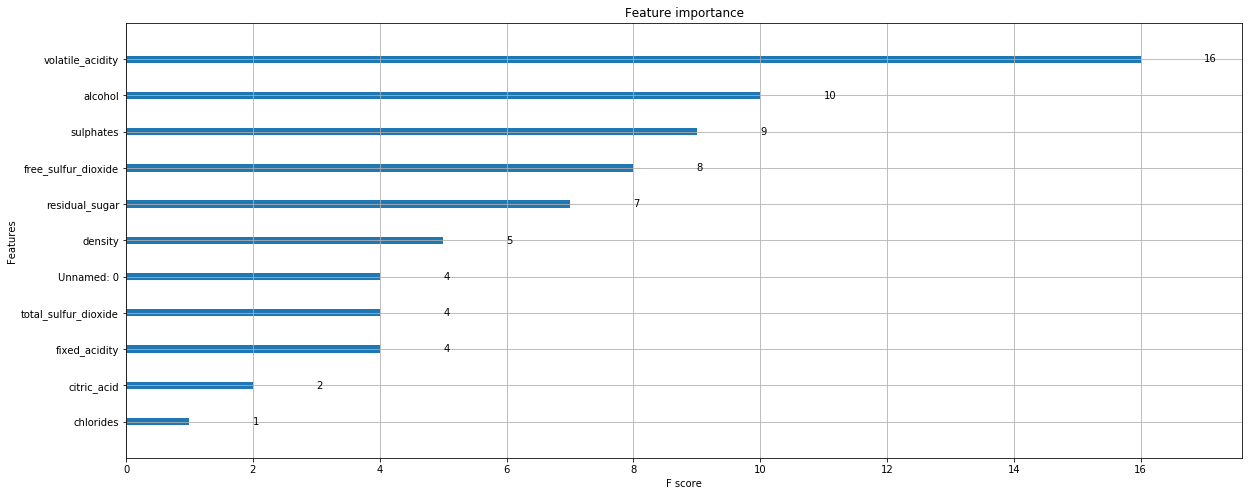

In [79]:

en_iyi_parametreler = {'objective':'reg:linear',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3, 
                       'n_estimators': 50,
                       'silent':1
                      }

wine_modeli = xgb.train(params=en_iyi_parametreler, dtrain=wine_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(wine_modeli)
ax.figure.set_size_inches(20,8)
plt.show()

XGBoost'un görselleştirme olarak sunduğu araçlardan biri de plot_tree() fonksiyonudur. Bu fonksiyonu kullanarak ağaçları ve dalları görebiliriz.


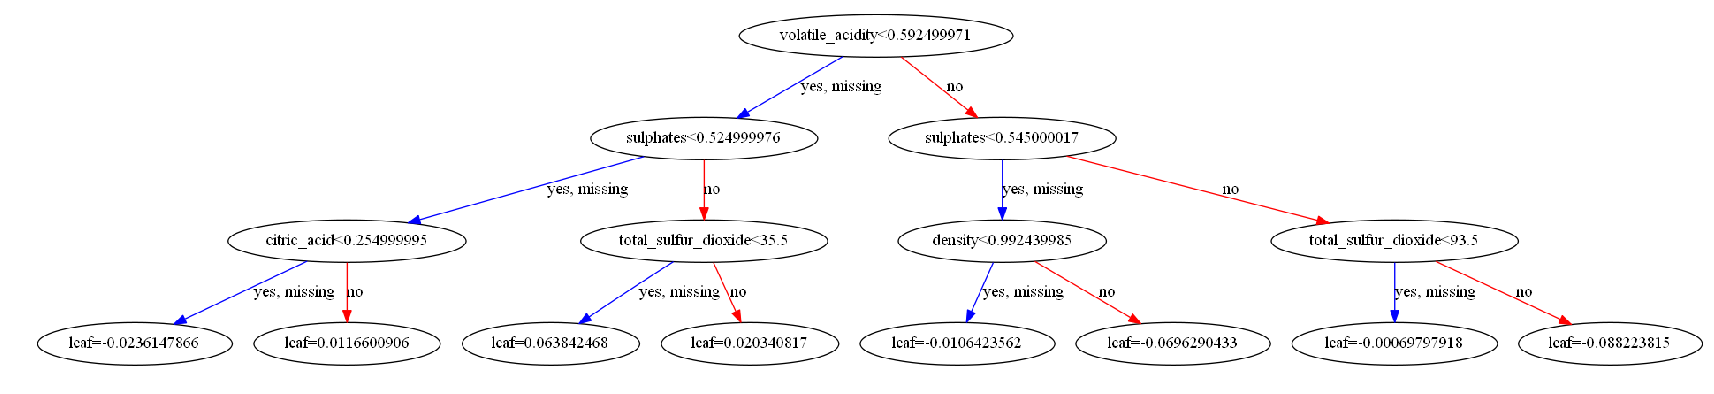

In [81]:
ax1 = xgb.plot_tree(wine_modeli, num_trees=4)
ax1.figure.set_size_inches(30,30)
plt.show()